In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense



In [2]:
import numpy as np
import matplotlib as plt

In [4]:
# Load your dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv(r"C:\Users\Prathamesh\Downloads\Assignment Deep Learning\concrete_data.csv")
df


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
# Check for missing values
df.isnull().sum()

# Handle missing values if any
# For example, you can use df.fillna() or dropna() depending on your data


Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30  
            Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min    

C:\Users\Prathamesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


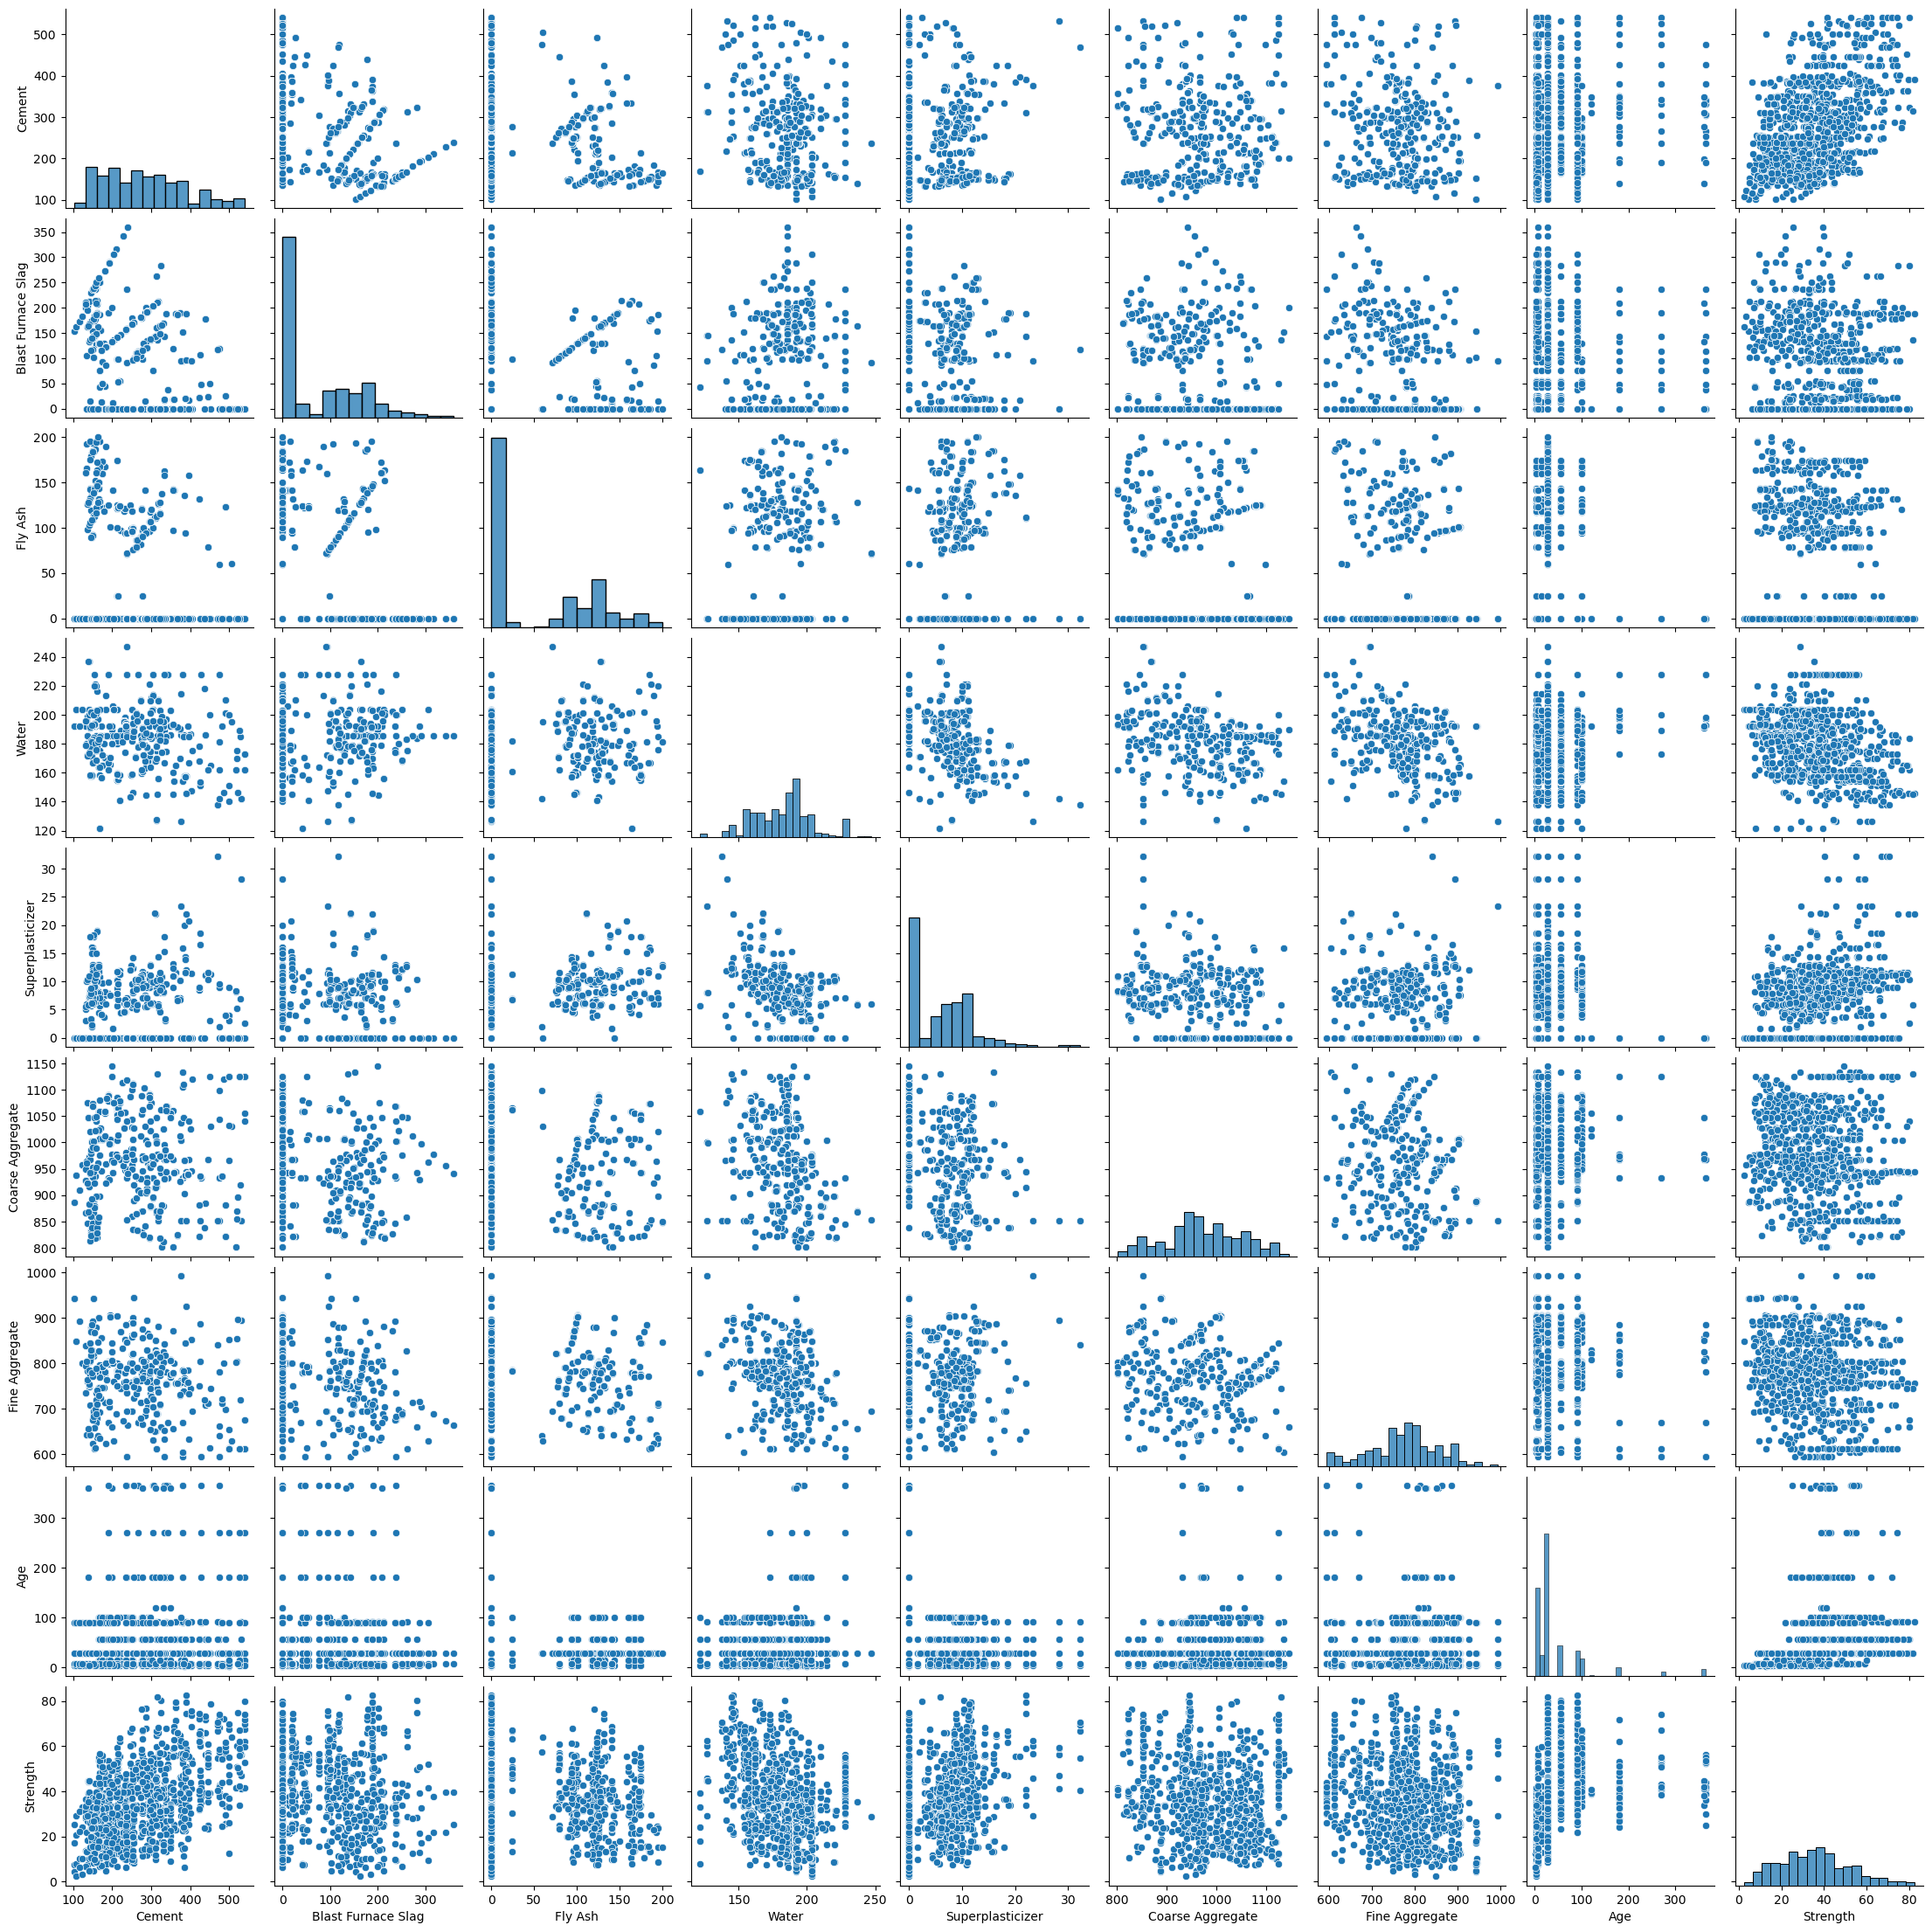

In [6]:
# Display the first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Correlation matrix
print(df.corr())

# Visualization (example: pair plot using seaborn)
import seaborn as sns
sns.pairplot(df)


In [8]:
# Separate features and target variable
X = df.drop('Strength', axis=1)
y = df['Strength']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional, but often recommended for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [10]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
y_pred = model.predict(X_test)

# Compute mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Epoch 1/50

26/26 [==============================] - 2s 16ms/step - loss: 1501.2034 - val_loss: 1385.5139
Epoch 2/50
26/26 [==============================] - 0s 5ms/step - loss: 1326.6338 - val_loss: 1172.6188
Epoch 3/50
26/26 [==============================] - 0s 5ms/step - loss: 1057.5582 - val_loss: 861.5997
Epoch 4/50
26/26 [==============================] - 0s 6ms/step - loss: 710.9797 - val_loss: 521.4766
Epoch 5/50
26/26 [==============================] - 0s 5ms/step - loss: 405.3022 - val_loss: 292.3818
Epoch 6/50
26/26 [==============================] - 0s 5ms/step - loss: 252.3729 - val_loss: 216.6416
Epoch 7/50
26/26 [==============================] - 0s 5ms/step - loss: 213.0441 - val_loss: 192.1266
Epoch 8/50
26/26 [==============================] - 0s 5ms/step - loss: 198.6630 - val_loss: 179.1489
Epoch 9/50
26/26 [==============================] - 0s 6ms/step - loss: 189.1719 - val_loss: 170.8712
Epoch 10/50
26/26 [==============================] - 0s 5ms/step - loss: 18